# Analytical Solution for SDoF System Response to Ramp Loading

This Python code calculates and visualizes the displacement response of a Single-Degree-of-Freedom (SDoF) mechanical system under ramp loading using analytical expressions. It models the system's behavior without relying on numerical simulation.

## Key Components and Parameters

1. **Symbols**:
   - `tau`: Time delay.
   - `t`: Time variable.

2. **Applied Loading Function**:
   - The code defines a function for the applied loading, which is a sinusoidal function with time delay.
   - It calculates the definite integral of this function over time.

3. **System Parameters**:
   - `P0`: Applied load amplitude (N).
   - `t1`: Rise time of the applied load (s).
   - `dt`: Time step for numerical simulation.

4. **Time Array**:
   - A time array is created to represent the simulation time.

5. **System Properties**:
   - Mass (`m`) of the SDoF system is defined.
   - A range of periods to test for the loading is specified.

6. **Analytical Solution**:
   - The code analytically derives the displacement response of the SDoF system under the specified ramp loading conditions.
   - It then plots the displacement ratio over time based on the analytical solution.

7. **Visualization**:
   - The resulting plot illustrates how the SDoF system responds to the specified ramp loading using an analytical approach.

## Usage

To use this code, you can modify the system parameters and the range of periods to test as needed for your specific problem. After running the code, the plot will show how the SDoF system responds to the specified ramp loading based on the analytical solution.

This code provides a valuable tool for understanding SDoF system responses to ramp loading scenarios using analytical expressions. It does not rely on numerical simulation, making it suitable for problems where analytical solutions are available or preferred.


In [13]:
# import the required python libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Import the necessary libraries.
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import math 

# Define the symbols that will be used.
m = sym.Symbol('m')      # Mass
w = sym.Symbol('w')      # Natural frequency
P0 = sym.Symbol('P0')    # Applied load
t1 = sym.Symbol('t1')    # Rise time
tau = sym.Symbol('tau')  # Time delay
t = sym.Symbol('t')      # Time

# Define the function for the applied loading.
f = tau * sym.sin(w * t - w * tau)

# Integrate the applied loading function over the time interval from 0 to t.
def_int = sym.integrate(f, (tau, 0, t))

# Print the definite integral.
print('This is the definite integral for the function: ')
sym.simplify(def_int)


This is the definite integral for the function: 


Piecewise(((t*w - sin(t*w))/w**2, ((w > -oo) | (w > 0)) & ((w > -oo) | (w < oo)) & ((w > 0) | (w < 0)) & ((w < 0) | (w < oo))), (0, True))

In [15]:
# Set the numerical values for the parameters.
P0 = 1000
t1 = 10
dt = 0.001

# Create a time array.
t = np.arange(0, t1 + dt, dt)

In [16]:
# Define the mass of the system
m = 20

# Define the range of periods to test
periodRange = [0.3, 0.4, 0.5]

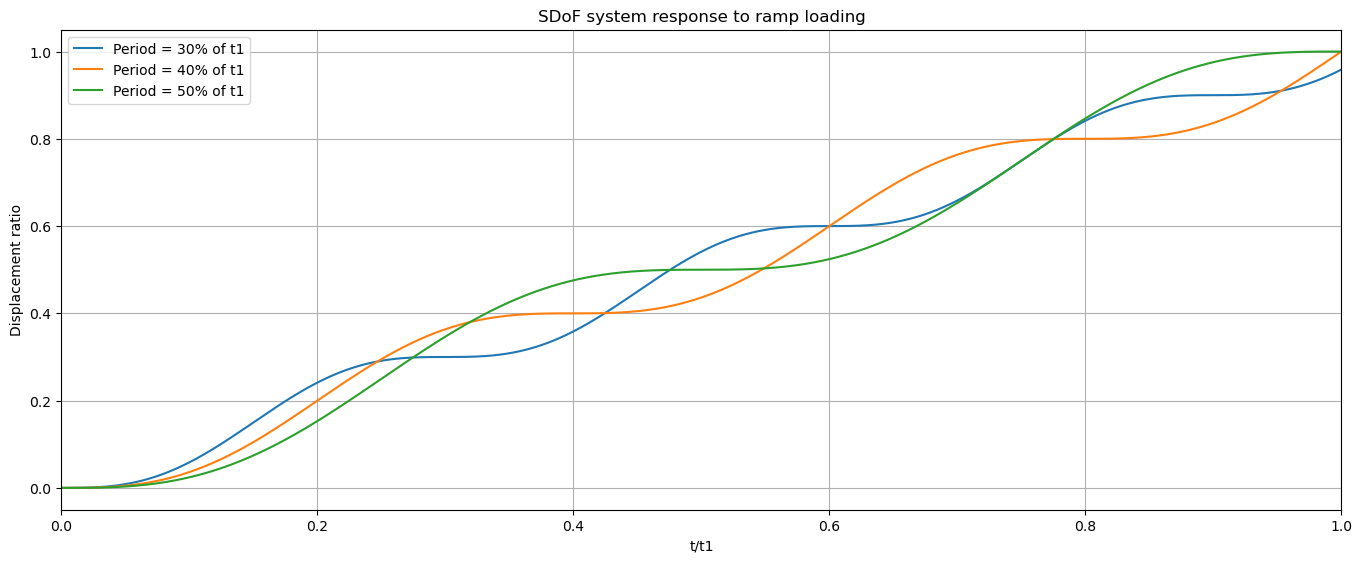

In [17]:
# Create a Matplotlib figure
fig = plt.figure()

# Add an axes to the figure
axes = fig.add_axes([0.1,0.1,2,1])

# Iterate over the range of periods
for period in periodRange:

    # Calculate the natural frequency
    T = period * t1
    wn = 2*math.pi / T

    # Calculate the spring stiffness
    k = m*wn**2

    # Calculate the displacement ratio
    u = (P0/k)*((t/t1) - ((np.sin(wn*t))/(wn*t1)))

    # Plot the displacement ratio
    axes.plot(t/t1, u/(P0/k), label=f'Period = {period * 100:.0f}% of t1')

# Set the axes labels
axes.set_xlabel('t/t1')
axes.set_ylabel('Displacement ratio')

# Set the title of the plot
axes.set_title('SDoF system response to ramp loading')

# Add a legend to the plot
axes.legend(loc='upper left')

# Set the x-axis limits
axes.set_xlim([0,1])

# Enable the grid
plt.grid()

# Show the plot
plt.show()
